In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("Na2SO4.xlsx")

In [3]:
X = data.drop('Sodium Sulphate',axis=1)

In [4]:
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean())

In [5]:
Y = data['Sodium Sulphate']

In [6]:
Y.shape

(520,)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [8]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0,1))
mm.fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [55]:
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth= 7), n_estimators=200, learning_rate=0.1)
model.fit(x_train, y_train)

C:\Users\Atif\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                  learning_rate=0.1, n_estimators=200)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create the AdaBoost regressor model
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),  n_estimators=180)


model.fit(x_train, y_train)

In [56]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score

In [58]:
train_R = r2_score(y_train, y_pred_train)
print("R^2 score:", train_R)

R^2 score: 0.977236657757205


In [59]:
test_R = r2_score(y_test, y_pred_test)
print("R^2 score:", test_R)

R^2 score: 0.8599322007568471


In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Predicted Y')

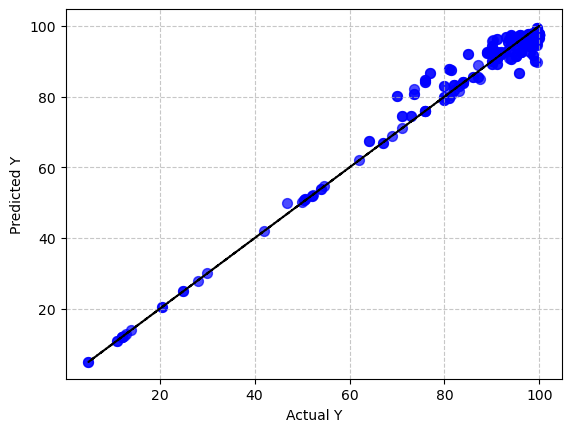

In [61]:
plt.scatter(y_train, y_pred_train, label='Training Data', s=50, c='blue', alpha=0.7)
plt.plot(y_train, y_train, label='Actual Y - Training', c='black', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

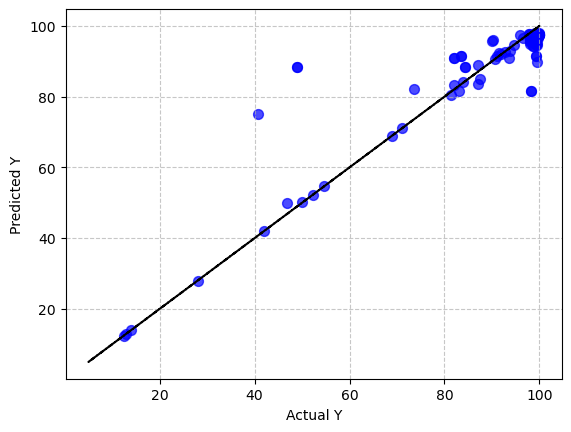

In [62]:
plt.scatter(y_test, y_pred_test, label='Training Data', s=50, c='blue', alpha=0.7)
plt.plot(y_train, y_train, label='Actual Y - Training', c='black', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

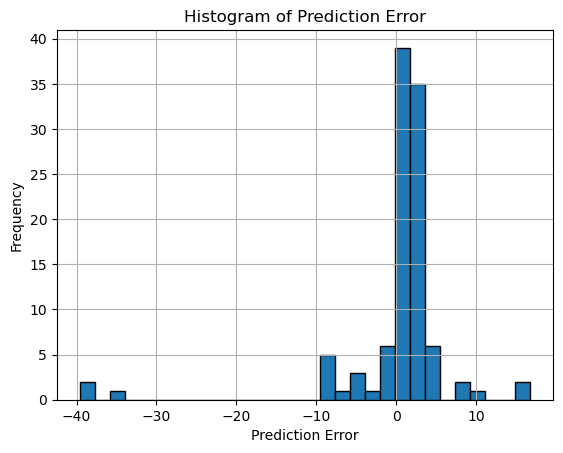

In [63]:
y_pred = model.predict(x_test)

# Calculate the prediction error
error = y_test - y_pred

# Draw the histogram of prediction error
plt.hist(error, bins=30,edgecolor='black')
plt.grid(True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Error')
plt.show()

In [53]:
!pip install tree
feature_names = X.columns.tolist()

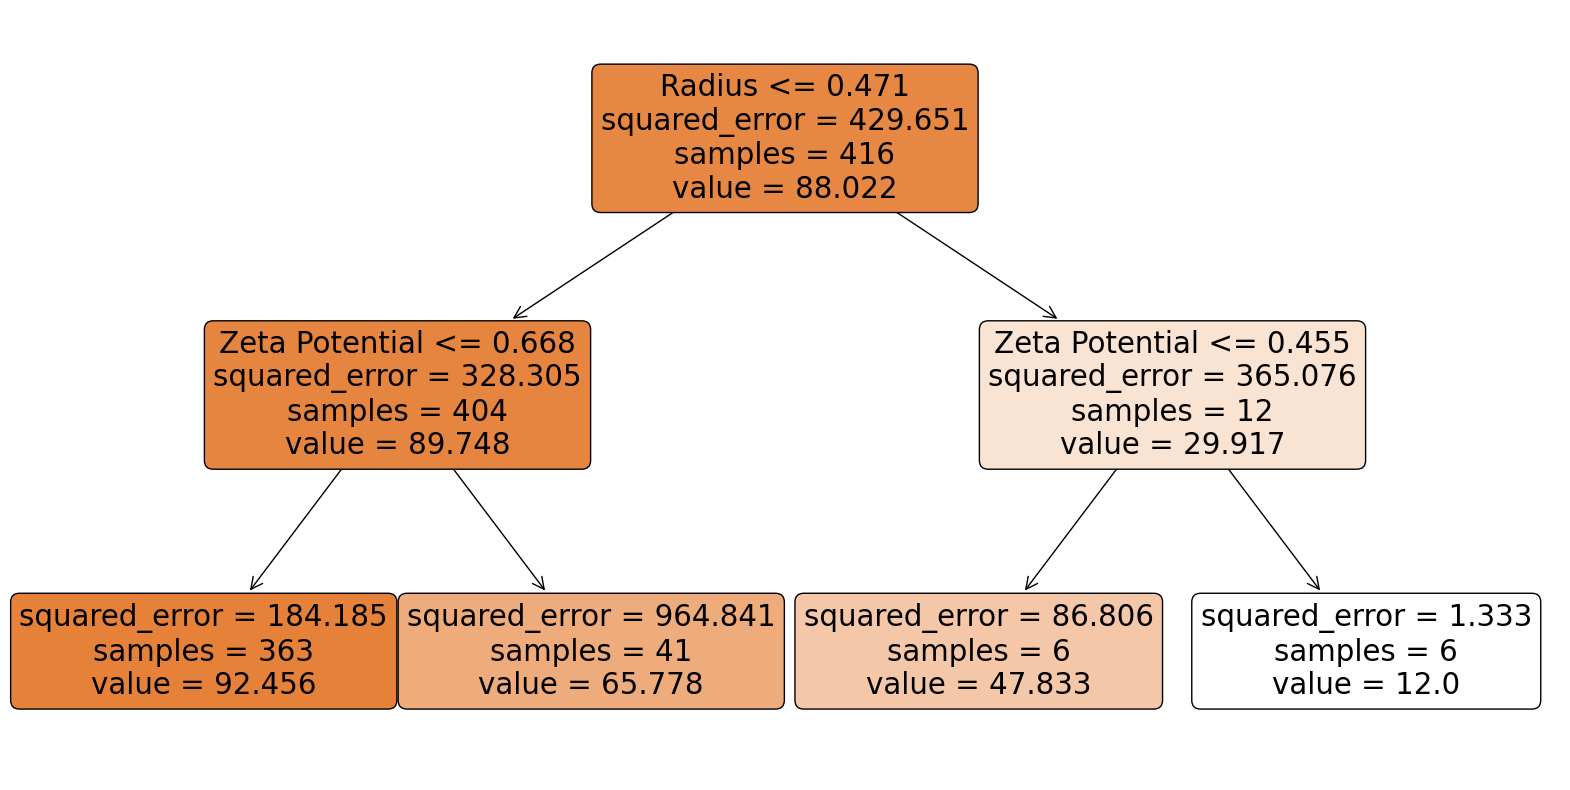

In [54]:
from sklearn.tree import plot_tree
tree_to_visualize = 0

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[tree_to_visualize], feature_names=feature_names, filled=True, rounded=True)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_rmse_mae(y_true, y_pred):
    """Calculates RMSE and MAE between two arrays using scikit-learn."""
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae


rmse, mae = calculate_rmse_mae(y_test, y_pred_test)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 7.560068049910472
MAE: 3.6796444064582614


In [ ]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the best parameters
print("Best parameters:", best_params)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

In [ ]:
plt.scatter(y_train, y_pred_train, label='Training Data', s=50, c='blue', alpha=0.7)
plt.plot(y_train, y_train, label='Actual Y - Training', c='red', linestyle='--')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [ ]:
plt.scatter(y_test, y_pred_test, label='Training Data', s=50, c='blue', alpha=0.7)
plt.plot(y_train, y_train, label='Actual Y - Training', c='red', linestyle='--')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')